In [1]:
import numpy as np
import pandas as pd 
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense,MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape) 

(60000, 28, 28)


In [4]:
X_train[0].min(), X_train[0].max()

(0, 255)

In [5]:
X_train = (X_train - 0.0) / (255.0 - 0.0)
X_test = (X_test - 0.0) / (255.0 - 0.0) 

In [6]:
X_train[0].min()

0.0

In [7]:
X_train[0].max()

1.0

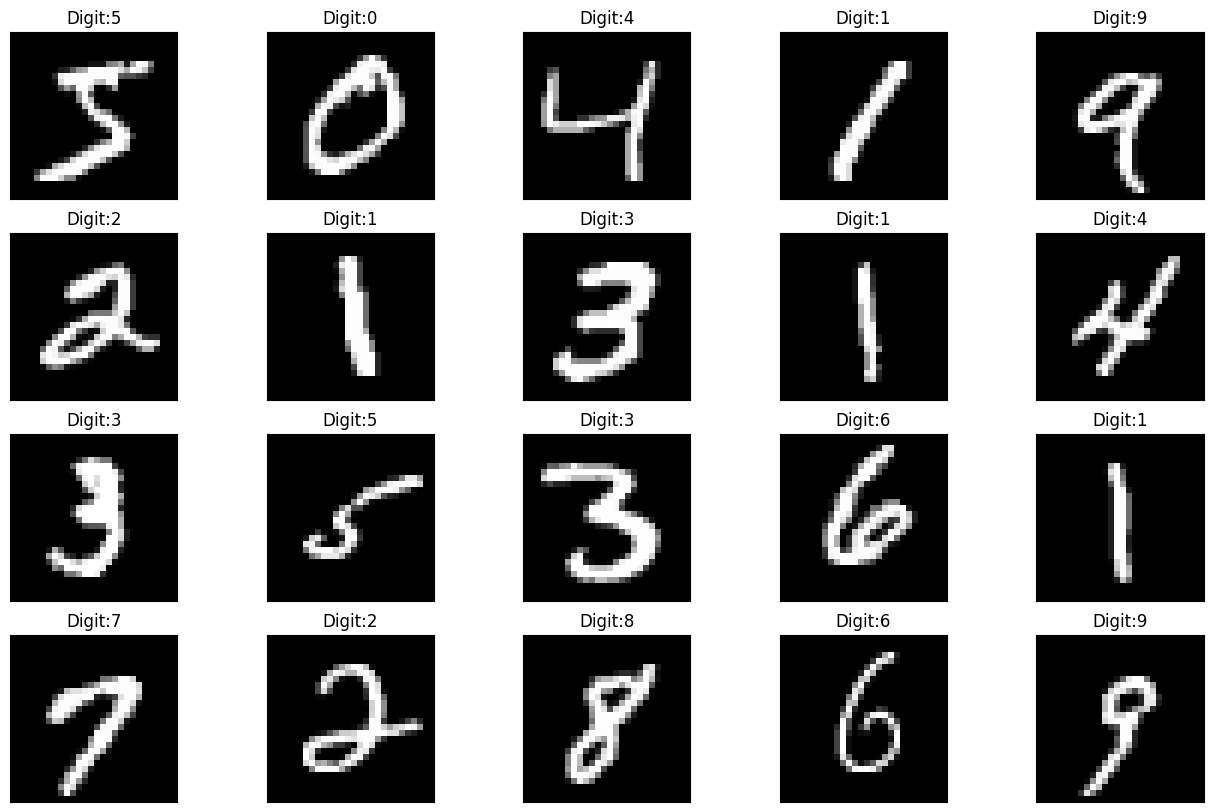

In [8]:
def plot_digit(image, digit, plt, i): 
    plt.subplot(4, 5, i + 1)
    plt.imshow(image, cmap=plt.get_cmap('gray')) 
    plt.title(f"Digit:{digit}")
    plt.xticks([])
    plt.yticks([]) 
plt.figure(figsize=(16,10)) 
for i in range(20):
    plot_digit(X_train[i],y_train[i],plt,i) 
plt.show()

In [9]:
X_train = X_train.reshape((X_train.shape + (1,))) 
X_test = X_test.reshape((X_test.shape +(1,)))

In [10]:
y_train[0:20]
c=np.array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],dtype='u1')

In [11]:
model = Sequential([
Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28,1)),
MaxPooling2D((2, 2)),
Flatten(),
Dense(100, activation="relu"), Dense(10,
activation="softmax")
])

In [12]:
optimizer=SGD(learning_rate=0.01,momentum=0.9) 
model.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542230 (2.07 MB)
Trainable params: 542230 (2.07 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [14]:
Model_log=model.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=15,
                    verbose=1,
                    validation_data=0);

Epoch 1/10
4000/4000 [==============================] - 95s 23ms/step - loss: 0.1776 - accuracy: 0.9457
Epoch 2/10
4000/4000 [==============================] - 114s 29ms/step - loss: 0.0533 - accuracy: 0.9832
Epoch 3/10
4000/4000 [==============================] - 110s 27ms/step - loss: 0.0340 - accuracy: 0.9893
Epoch 4/10
4000/4000 [==============================] - 137s 34ms/step - loss: 0.0219 - accuracy: 0.9931
Epoch 5/10
4000/4000 [==============================] - 112s 28ms/step - loss: 0.0150 - accuracy: 0.9953
Epoch 6/10
4000/4000 [==============================] - 105s 26ms/step - loss: 0.0110 - accuracy: 0.9966
Epoch 7/10
4000/4000 [==============================] - 97s 24ms/step - loss: 0.0074 - accuracy: 0.9979
Epoch 8/10
4000/4000 [==============================] - 103s 26ms/step - loss: 0.0043 - accuracy: 0.9987
Epoch 9/10
4000/4000 [==============================] - 118s 30ms/step - loss: 0.0027 - accuracy: 0.9993
Epoch 10/10
4000/4000 [==============================] - 

1/1 [==============================] - 0s 98ms/step


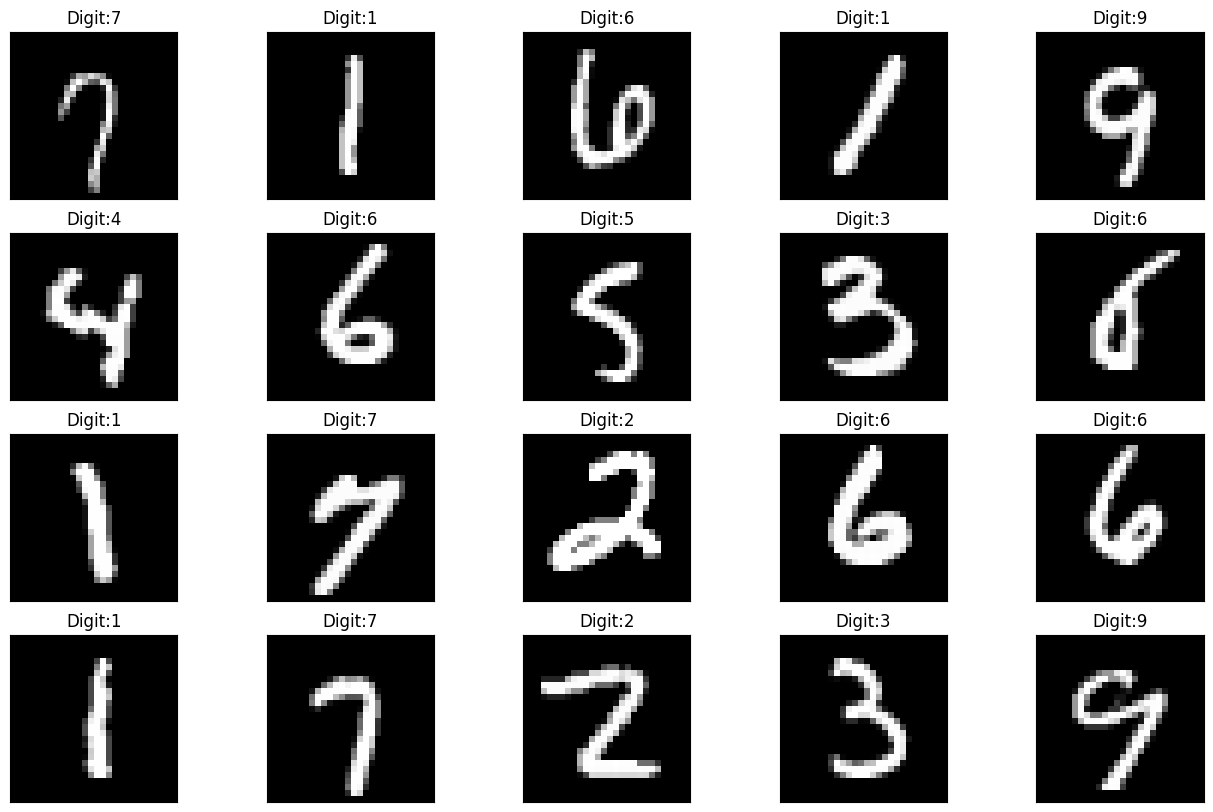

In [18]:
plt.figure(figsize=(16, 10))
for i in range(20):
    image = random.choice(X_test).squeeze()
    digit = np.argmax(model.predict(image.reshape((1, 28, 28, 1)))[0], axis=-1) 
    plot_digit(image, digit, plt, i)
plt.show()

In [19]:
#pred = model.predict(X_test)
#classes_x = np.argmax(X_test, axis=1)
#predictions = np.argmax(model.predict(x_tes), axis=-1)

predictions=np.argmax(model.predict(X_test),axis=-1) 
accuracy_score(y_test,predictions)

313/313 [==============================] - 5s 17ms/step


0.9879

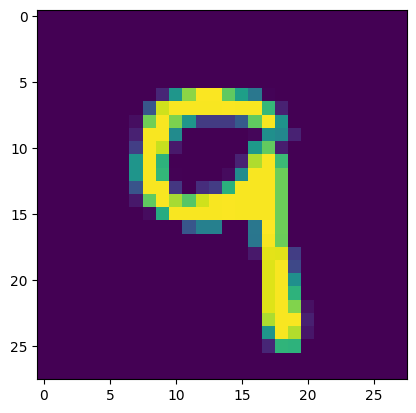

In [20]:
n=random.randint(0,999)
plt.imshow(X_test[n]) 
plt.show()

In [21]:
predicted_value=model.predict(X_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))

313/313 [==============================] - 4s 12ms/step
Handwritten number in the image is= 9


In [22]:
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.05003873631358147
Test accuracy: 0.9879000186920166


In [ ]:
#the implemented CNN model is giving results for test mnist dataset